In [2]:
from sympy import *
init_printing(use_unicode=True)

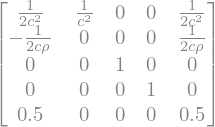

In [90]:
# compute the eigenvector matrix S
c = Symbol('c')
rho = Symbol('rho')
S = Matrix([[1/(2*c**2), 1/c**2, 0, 0, 1/(2*c**2)],
            [-1/(2*rho*c), 0, 0, 0, 1/(2*rho*c)],
            [0, 0, 1, 0, 0],
            [0, 0, 0, 1, 0],
            [1/2, 0, 0, 0, 1/2]])
S

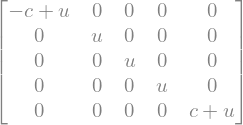

In [91]:
# compute eigenvalue matrix \lambda
u = Symbol('u')
lambda_waves = diag(u-c, u, u, u, u+c)
lambda_waves

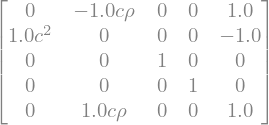

In [99]:
# compute S^{-1}
Sinv = S.inv()
Sinv

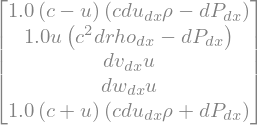

In [132]:
# compute the \mathcal{L} matrix
#drho_dx = Symbol(r'\frac{\partial \rho}{\partial x}')
#du_dx = Symbol(r'\frac{\partial u}{\partial x}')
#dv_dx = Symbol(r'\frac{\partial v}{\partial x}')
#dw_dx = Symbol(r'\frac{\partial w}{\partial x}')
#dp_dx = Symbol(r'\frac{\partial p}{\partial x}')
drho_dx = Symbol('drho_dx')
du_dx = Symbol('du_dx')
dv_dx = Symbol('dv_dx')
dw_dx = Symbol('dw_dx')
dp_dx = Symbol('dP_dx')
dQ_dx_def = Matrix([drho_dx, du_dx, dv_dx, dw_dx, dp_dx])
L = simplify(lambda_waves * Sinv * dQ_dx_def)
L

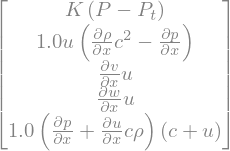

In [117]:
K = Symbol('K')
p = Symbol('P')
p_t = Symbol('P_t')
L_outflow_x1_upper = Matrix([K*(p-p_t), L[1], L[2], L[3], L[4]])
L_outflow_x1_upper

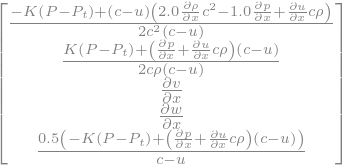

In [118]:
dQ_dx_outflow_x1_upper = simplify(S * Inverse(lambda_waves) * L_outflow_x1_upper)
dQ_dx_outflow_x1_upper

In [111]:
cxxcode(dQ_dx_outflow_x1_upper[0])

'(1.0/2.0)*(-K*(P - P_t) + (c - u)*(2.0*std::pow(c, 2)*drho_dx + c*du_dx*rho - 1.0*dP_dx))/(std::pow(c, 2)*(c - u))'

In [112]:
cxxcode(dQ_dx_outflow_x1_upper[1])

'(1.0/2.0)*(K*(P - P_t) + (c - u)*(c*du_dx*rho + dP_dx))/(c*rho*(c - u))'

In [113]:
cxxcode(dQ_dx_outflow_x1_upper[2])

'dv_dx'

In [114]:
cxxcode(dQ_dx_outflow_x1_upper[3])

'dw_dx'

In [115]:
cxxcode(dQ_dx_outflow_x1_upper[4])

'0.5*(-K*(P - P_t) + (c - u)*(c*du_dx*rho + dP_dx))/(c - u)'

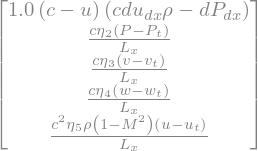

In [133]:
eta_2 = Symbol('eta_2')
eta_3 = Symbol('eta_3')
eta_4 = Symbol('eta_4')
eta_5 = Symbol('eta_5')
Lx = Symbol('L_x')
M = Symbol('M')
u_t = Symbol('u_t')
v = Symbol('v')
v_t = Symbol('v_t')
w = Symbol('w')
w_t = Symbol('w_t')

L_inflow_x1_lower = Matrix([L[0],
                            eta_2*(c/Lx)*(p-p_t),
                            eta_3*(c/Lx)*(v-v_t),
                            eta_4*(c/Lx)*(w-w_t),
                            eta_5*(rho*c**2 * (1 - M**2) / Lx)*(u - u_t)])
L_inflow_x1_lower

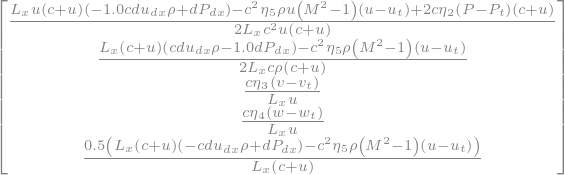

In [134]:
dQ_dx_inflow_x1_lower = simplify(S * Inverse(lambda_waves) * L_inflow_x1_lower)
dQ_dx_inflow_x1_lower

In [140]:
cxxcode(dQ_dx_inflow_x1_lower[0])

'(1.0/2.0)*(L_x*u*(c + u)*(-1.0*c*du_dx*rho + dP_dx) - std::pow(c, 2)*eta_5*rho*u*(std::pow(M, 2) - 1)*(u - u_t) + 2*c*eta_2*(P - P_t)*(c + u))/(L_x*std::pow(c, 2)*u*(c + u))'

In [141]:
cxxcode(dQ_dx_inflow_x1_lower[1])

'(1.0/2.0)*(L_x*(c + u)*(c*du_dx*rho - 1.0*dP_dx) - std::pow(c, 2)*eta_5*rho*(std::pow(M, 2) - 1)*(u - u_t))/(L_x*c*rho*(c + u))'

In [142]:
cxxcode(dQ_dx_inflow_x1_lower[2])

'c*eta_3*(v - v_t)/(L_x*u)'

In [143]:
cxxcode(dQ_dx_inflow_x1_lower[3])

'c*eta_4*(w - w_t)/(L_x*u)'

In [144]:
cxxcode(dQ_dx_inflow_x1_lower[4])

'0.5*(L_x*(c + u)*(-c*du_dx*rho + dP_dx) - std::pow(c, 2)*eta_5*rho*(std::pow(M, 2) - 1)*(u - u_t))/(L_x*(c + u))'